In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
df = pd.read_csv('threeCircles.txt', header=None, names=['X1', 'X2', 'Label'], sep=",")
print(df.head())


         X1        X2  Label
0 -0.208626 -0.264189     -1
1  0.499955 -0.073624     -1
2 -0.241661 -0.221071     -1
3 -0.356841  0.204201     -1
4  0.529480  0.170605     -1


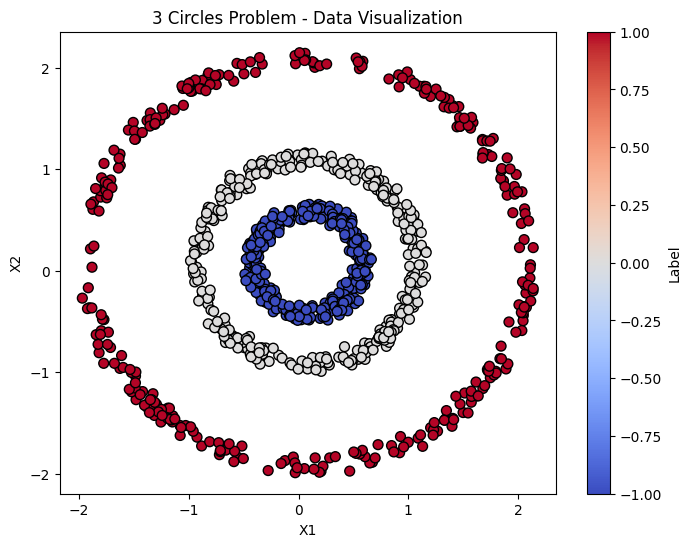

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'], c=df['Label'], cmap='coolwarm', edgecolors='k', s=50)
plt.title('3 Circles Problem - Data Visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()


In [25]:
X = df[['X1', 'X2']].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")

Accuracy of Logistic Regression: 0.2400


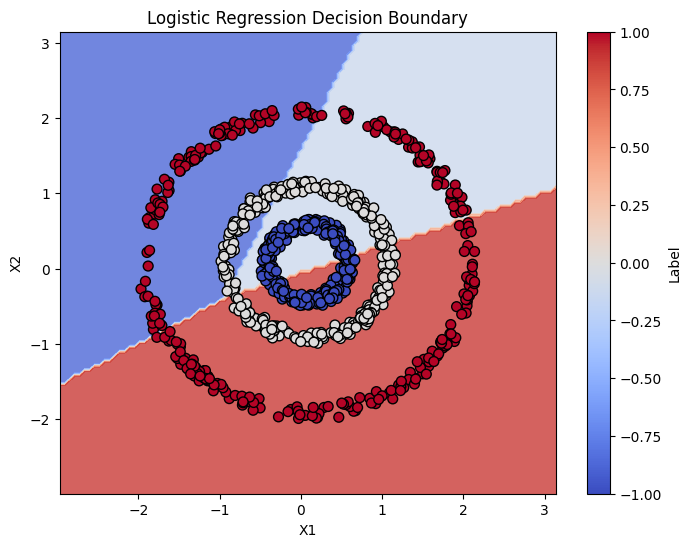

In [26]:
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = df['X2'].min() - 1, df['X2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(df['X1'], df['X2'], c=df['Label'], cmap='coolwarm', edgecolors='k', s=50)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Label')
plt.show()


In [27]:
X2 = np.sum(X**2, axis=1).reshape(-1, 1)
DIST_euclid = X2 + X2.T - 2 * np.dot(X, X.T)

In [28]:
sigma = 2
K = np.exp(-DIST_euclid / (2 * sigma ** 2))

In [29]:
N = K.shape[0]
U = np.ones((N, N)) / N
Kn = K - np.dot(U, K) - np.dot(K, U) + np.dot(np.dot(U, K), U)


In [30]:
eigenvalues, eigenvectors = np.linalg.eigh(Kn)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]


In [31]:
XG_3 = np.dot(Kn, eigenvectors_sorted[:, :3])
XG_20 = np.dot(Kn, eigenvectors_sorted[:, :20])
XG_100 = np.dot(Kn, eigenvectors_sorted[:, :100])

print("Projection for top 3 dimensions:", XG_3[:5]) 
print("Projection for top 20 dimensions:", XG_20[:5]) 


Projection for top 3 dimensions: [[ 1.94395572 -1.05791205  1.28011637]
 [ 0.16594007  2.1301927   1.25761892]
 [ 1.77157061 -1.26484994  1.28498602]
 [-0.19501095 -2.2925651   1.2456608 ]
 [-1.05870038  1.9827827   1.20767633]]
Projection for top 20 dimensions: [[ 1.94395572e+00 -1.05791205e+00  1.28011637e+00  1.31083128e-01
   2.41693572e-03  3.37239501e-02 -3.18941629e-03  3.58135296e-02
  -5.78575199e-02  7.58642641e-05 -6.77606897e-04  2.58372418e-03
  -5.68153565e-04  2.31976087e-03  8.24578513e-05  2.34810684e-06
   1.54406745e-05  3.24218703e-07  9.68843739e-06  1.44225854e-05]
 [ 1.65940065e-01  2.13019270e+00  1.25761892e+00  5.68374310e-03
  -4.33488335e-02 -2.03450555e-02 -3.58844864e-02  3.71619605e-02
   4.30593478e-02 -1.60735690e-04 -4.38929791e-04 -6.98299138e-04
  -2.17077356e-03  2.33843375e-03  6.23607235e-05  4.09795635e-05
   6.21706529e-05  6.39525143e-06 -1.66103306e-05 -6.57728253e-06]
 [ 1.77157061e+00 -1.26484994e+00  1.28498602e+00  1.30350040e-01
  -2.1579

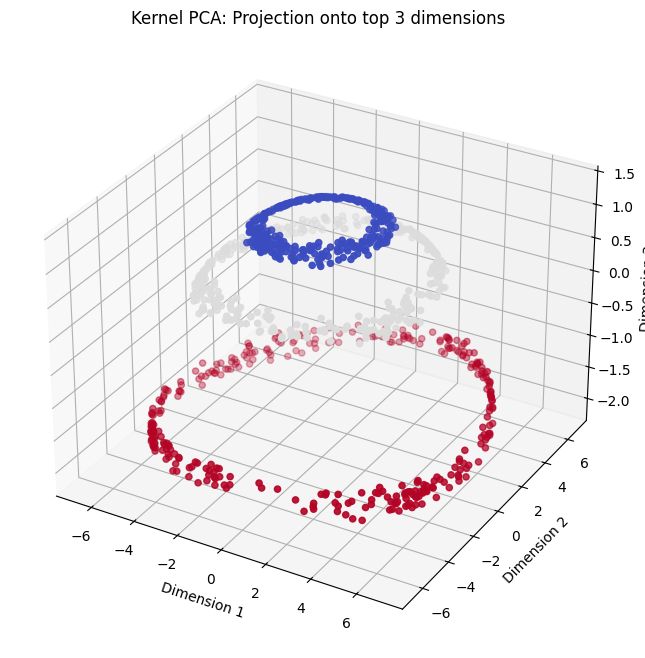

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(XG_3[:, 0], XG_3[:, 1], XG_3[:, 2], c=y, cmap='coolwarm')
ax.set_title('Kernel PCA: Projection onto top 3 dimensions')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


In [33]:
X_train, X_test, y_train, y_test = train_test_split(XG_3, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): {accuracy:.4f}")

Accuracy of Logistic Regression on Kernelized Data (top 3 dimensions): 1.0000


In [34]:
X_train, X_test, y_train, y_test = train_test_split(XG_20, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression on Kernelized Data (top 20 dimensions): {accuracy:.4f}")


Accuracy of Logistic Regression on Kernelized Data (top 20 dimensions): 1.0000


## Verifying using SKLearn Implementation

         X1        X2  Label
0 -0.208626 -0.264189     -1
1  0.499955 -0.073624     -1
2 -0.241661 -0.221071     -1
3 -0.356841  0.204201     -1
4  0.529480  0.170605     -1
Transformed Shape: (1000, 20)
Accuracy: 1.0
RMSE: 0.0


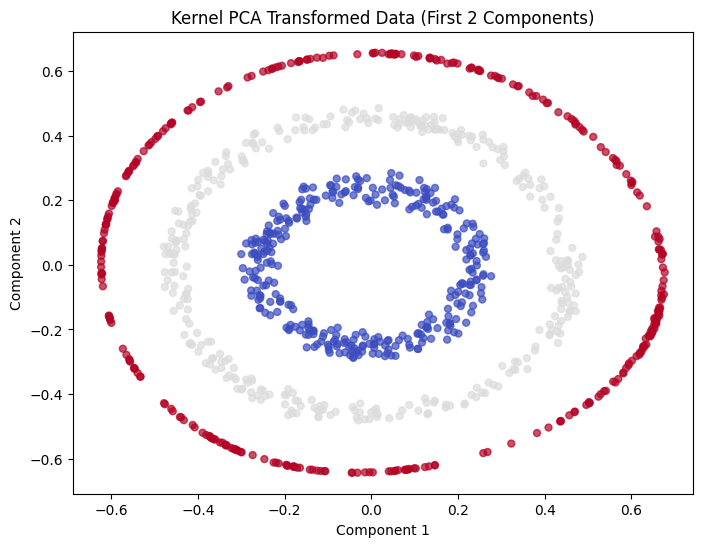

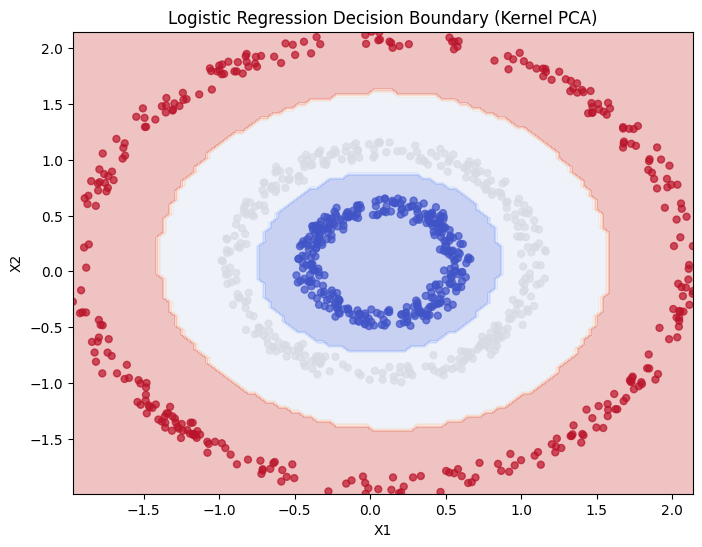

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('threeCircles.txt', header=None, names=['X1', 'X2', 'Label'], sep=",")
print(df.head())

X = df[['X1', 'X2']].values
y = df['Label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sigma = 2
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=1/(2 * sigma**2))
X_kpca = kpca.fit_transform(X_scaled)
print("Transformed Shape:", X_kpca.shape)

clf = LogisticRegression()
clf.fit(X_kpca, y)

y_pred = clf.predict(X_kpca)
accuracy = accuracy_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"Accuracy: {accuracy}")
print(f"RMSE: {rmse}")

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', marker='o', s=25, alpha=0.7)
plt.title("Kernel PCA Transformed Data (First 2 Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', s=25, alpha=0.7)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
grid_points_kpca = kpca.transform(grid_points_scaled)

Z = clf.predict(grid_points_kpca)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary (Kernel PCA)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
